# Codigo Ejercicio 2
## Integrantes 
* Gatica Isaias
* Martin Santiago
* Saez Lautaro Andres
* Vidman Xavier

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.fftpack import fft, fftshift,fftfreq
plt.rcParams.update( { 'font.size':25, 'figure.figsize': (16,9) } )

### calcular_fft recibe como parametros una señal x_c, Fs la cual es la frecuencia de muestreo, escrita como funcion y N, el cual puede ser un entero que hace referencia al numero de muestras de x con el que se calcula la fft o un vector, para el ultimo caso se aplica el algoritmo de calcular fft para cada elemento de N.
### Dicha funcion retorna un diccionario que contiene la fft que posee los siguientes atributos:
* Ns: solo en el caso de que N sea un vector e indica cuantas muestras se utilizaron para calcular la fft
* X: contiene los valores de la fft
* shift_X: contiene la version centrada de la fft de x
* freq: posee las frecuencias de la fft

In [2]:
def calcular_fft( x_c, Fs, N ):
    if( type( N ) != int ):
        resultados = {
            'N': [],
            'X': [],
            'shift_X': [],
            'freq': []
        }
        for N_ in N:
            resultado = calcular_fft( x_c, Fs, N_ )
            resultados['N'].append( N_ )
            resultados['freq'].append( resultado['freq']  )
            resultados['X'].append( resultado['X'] )
            resultados['shift_X'].append( resultado['shift_X'] )
    else:        
        n = np.arange( 0, N, 1 )
        x = lambda n: x_c( n / Fs )
        x_e = x(n)
        X = fft( x_e ) / N
        freq = fftshift( fftfreq( N ) ) * Fs
        resultados = {
            'X': X,
            'shift_X': fftshift( X ),
            'freq': freq
        }
    
    return resultados

In [3]:
Fs = 400
x_c = lambda t: np.sin(200 *np.pi*t)
x = lambda n: np.sin( np.pi * n / 2 )  

In [4]:
X = calcular_fft( x_c, Fs, 4 )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


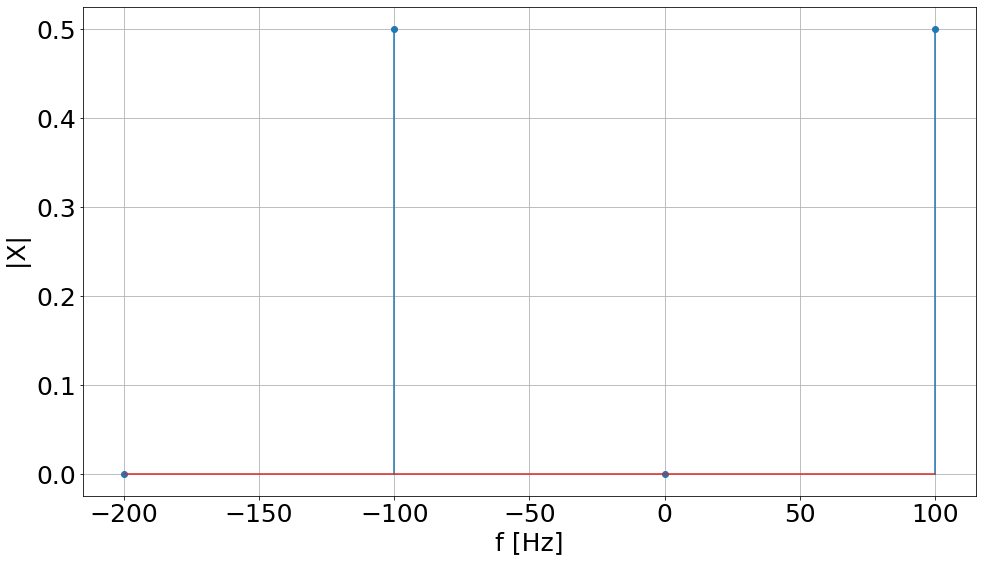

In [5]:
plt.stem( X['freq'] ,np.abs( X['shift_X'] ) )
plt.xlabel( 'f [Hz]' )
plt.ylabel( ' |X| ' )

plt.grid()

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


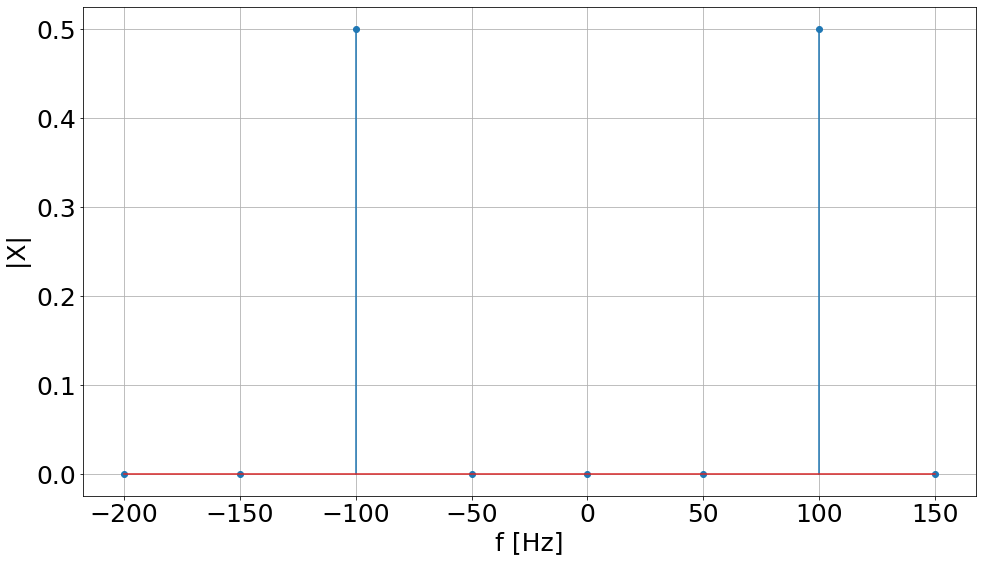

In [6]:
X = calcular_fft( x_c, Fs, 8 )
plt.stem( X['freq'],np.abs( X['shift_X'] ) )
plt.xlabel( 'f [Hz]' )
plt.ylabel( ' |X| ' )

plt.grid()
plt.savefig( './Img/punto_2_d.png' )

## e)

In [7]:
X = calcular_fft( x_c, Fs, 5 )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


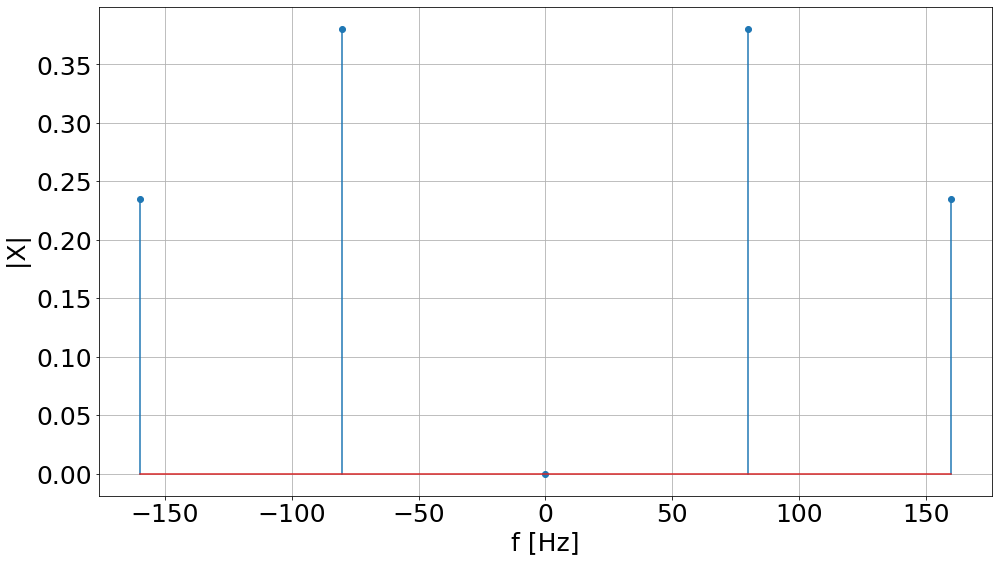

In [8]:
plt.stem( X['freq'] ,np.abs( X['shift_X'] ) )
plt.xlabel( 'f [Hz]' )
plt.ylabel( ' |X| ' )

plt.grid()
plt.savefig( './Img/punto_2_e.png' )

## g)

In [9]:
escalon = lambda t: np.piecewise( t, t>=0, [1,0] )
x_1 = lambda t: 4 * np.sin(2000 * np.pi *t) +3 * np.sin(4000*np.pi * t)+ 2 * np.sin( 6000 *np.pi * t )
x_2 = lambda t:  np.sum( [escalon( t + 2 - 10*k ) * escalon( 2 - t + 10*k ) for k in range( -100, 100 ) ], axis=0 )

In [10]:
def graficar_CTFS( x_c, Fs, N, path=None, phase_mod=True, envolvente=None ):
    X_datos = calcular_fft( x_c, Fs, N )
    f = X_datos['freq']
    X = X_datos['shift_X']
    if( phase_mod ):
        fig, axs = plt.subplots(2, 1)
        plt.subplots_adjust( hspace=.7 )

        axs[0].stem( f, np.abs(X) )
        axs[0].set_xlabel( 'f [Hz]' )
        axs[0].set_ylabel( '|X|' )
        axs[0].grid()

        axs[1].stem( f, np.angle( X ) )
        axs[1].set_xlabel( 'f [Hz]' )
        axs[1].set_ylabel( 'arg(X)' )
        axs[1].grid()
    else: 
        fig = plt.figure()
        ax = fig.gca()
        ax.stem( f, X )
        ax.set_xlabel('f [Hz]')
        ax.set_ylabel('Amplitud')
        ax.grid()
        if( envolvente ):
            freqs = np.linspace( min( f ), max(f), 2000 )
            ax.plot( freqs, envolvente( freqs ), 'r-.', lw=3 )
            ax.legend( ['Envolvete', 'aproximacion CTFS'] )
        
    if( path ):
        plt.savefig( path )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


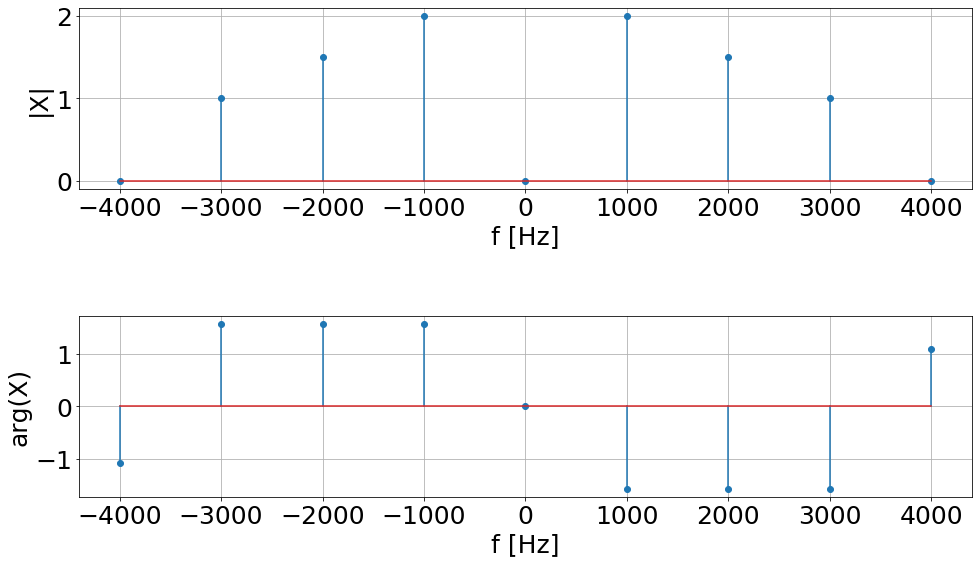

In [11]:
graficar_CTFS( x_1, 9000, 9, './Img/punto_2_g_1.png' )

/home/lautaro/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


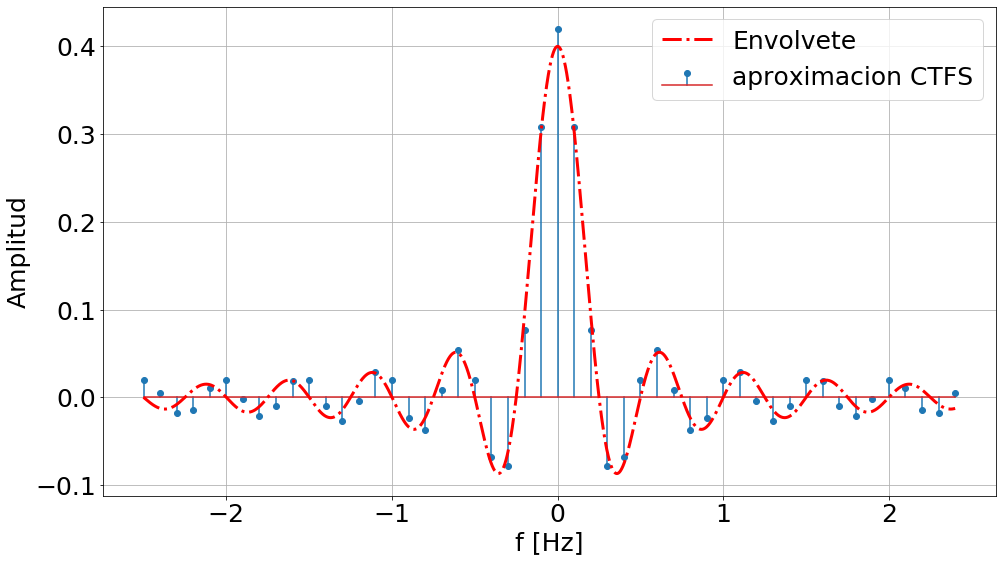

In [12]:
envolvente = lambda f: 4/10 * np.sinc( 2/5 * f * 10 )
graficar_CTFS( x_2, 5, 50 , './Img/punto_2_g_2.png', phase_mod=False, envolvente= envolvente )

In [13]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from IPython.display import HTML
import seaborn as sns

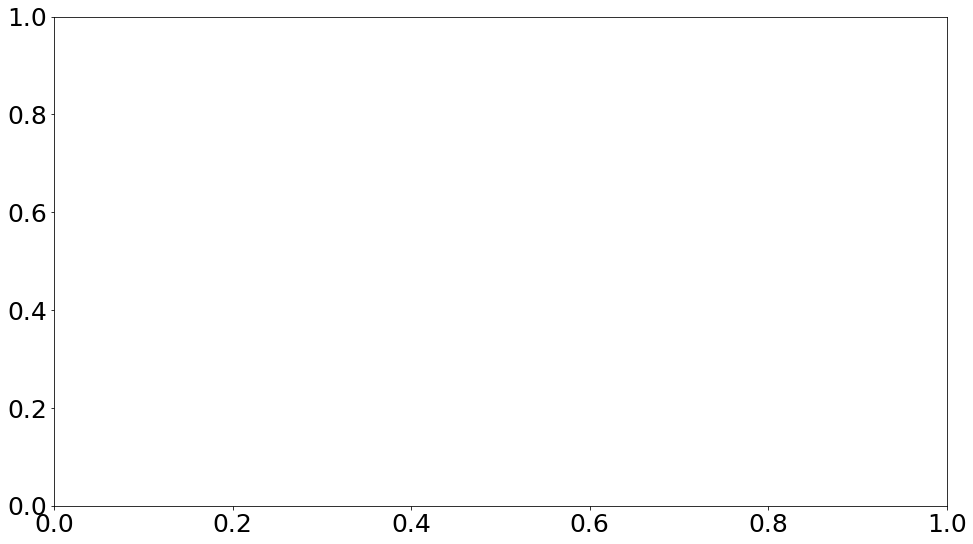

In [14]:
fig = plt.figure()
ax = fig.gca()

freqs = np.linspace( -2, 2, 2000 )

envolvente_evaluada = envolvente( freqs )

def animate( i ):
    ax.cla()
    
    Fs = 2 + i
    resultados = calcular_fft( x_2, Fs, 10*Fs )
    
    f = resultados['freq']
    X = resultados['shift_X']
    
    ax.stem( f, X )
    ax.plot( freqs, envolvente( freqs ), 'r-.', lw=3 )
    
    ax.legend( ['Envolvete', 'aproximacion CTFS'] )
    ax.set_title( 'CTFS aproximada para $F_s$='+str( Fs )+'$muestras/s$' )
    ax.set_xlabel('f [Hz]')
    ax.set_ylabel('Amplitud')
    ax.set_xlim( [ -2, 2 ] )
    ax.grid()

In [ ]:
graficar = input('desea graficar?: ')
if graficar=='si':
    anim = FuncAnimation(fig, animate, frames=25)
    anim.save('./punto_2_g_ii.mp4', writer='ffmpeg', fps=2)
    HTML( anim.to_jshtml() )